In [1]:
#Importar las librerías a ocupar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lectura del archivo y visualización inicial de datos
df = pd.read_csv("vgsales.csv")

df.head()
df.tail()
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5185,5187,Monster Rancher 3,PS2,2001.0,Simulation,Tecmo Koei,0.11,0.09,0.14,0.03,0.36
216,217,God of War III,PS3,2010.0,Action,Sony Computer Entertainment,2.74,1.36,0.12,0.63,4.84
15251,15254,Painkiller,PC,2004.0,Shooter,DreamCatcher Interactive,0.00,0.02,0.00,0.00,0.02
11195,11197,Counter-Strike: Source,PC,2004.0,Shooter,Vivendi Games,0.00,0.07,0.00,0.02,0.09
2483,2485,Battle of Giants: Dinosaurs,DS,2008.0,Strategy,Ubisoft,0.38,0.37,0.00,0.09,0.83


In [3]:
# Información general
df.info()

# Estadísticos descriptivos
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
#Cambio de "Year" de Float a Int
df['Year'] = df['Year'].astype('Int64')

In [6]:
#1-Totales
#1.1-Total de videojuegos analizados
total_games = df['Name'].nunique()
print("Total de videojuegos:", total_games)

Total de videojuegos: 11493


In [8]:
#1-Totales
#1.2-Total de géneros analizados
total_genres = df['Genre'].nunique()
print("Total de géneros:", total_genres)

Total de géneros: 12


In [9]:
#1-Totales
#1.3-Total de plataformas analizados
total_platforms = df['Platform'].nunique()
print("Total de plataformas:", total_platforms)

Total de plataformas: 31


In [10]:
#2-Ventas
#2.1-Total de ventas por año y región
sales_by_year = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()

sales_by_year.tail()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2014,131.97,125.65,39.46,40.02,337.05
2015,102.82,97.71,33.72,30.01,264.44
2016,22.66,26.76,13.70,7.75,70.93
2017,0.00,0.00,0.05,0.00,0.05
2020,0.27,0.00,0.00,0.02,0.29


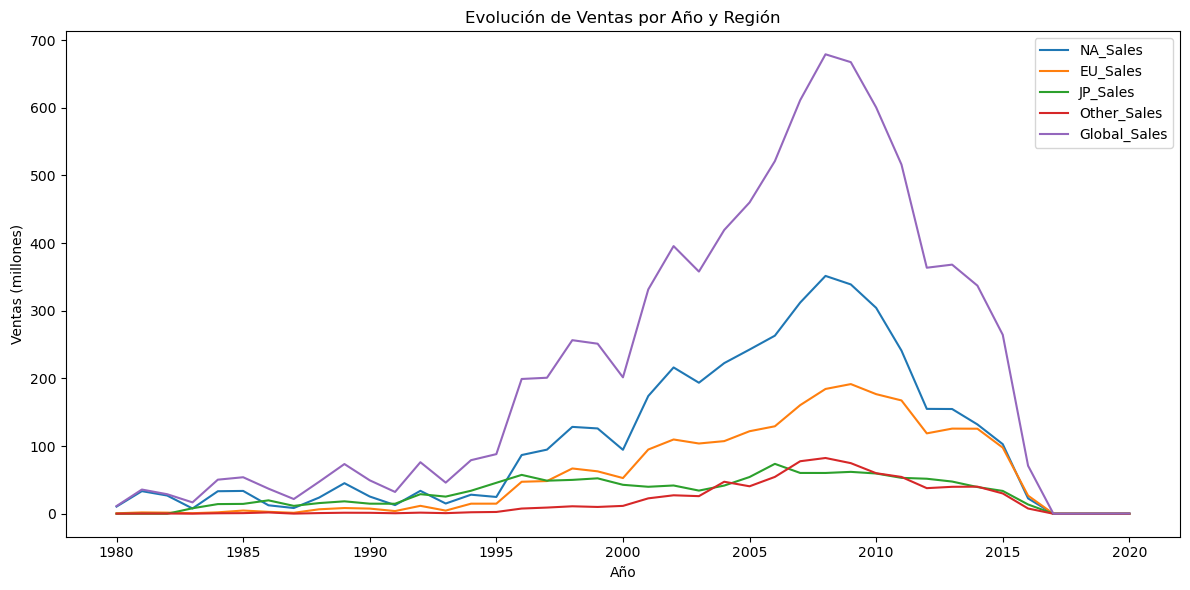

In [33]:
plt.figure(figsize=(12,6))

for column in sales_by_year.columns:
    plt.plot(sales_by_year.index, sales_by_year[column], label=column)

plt.title("Evolución de Ventas por Año y Región")
plt.xlabel("Año")
plt.ylabel("Ventas (millones)")
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

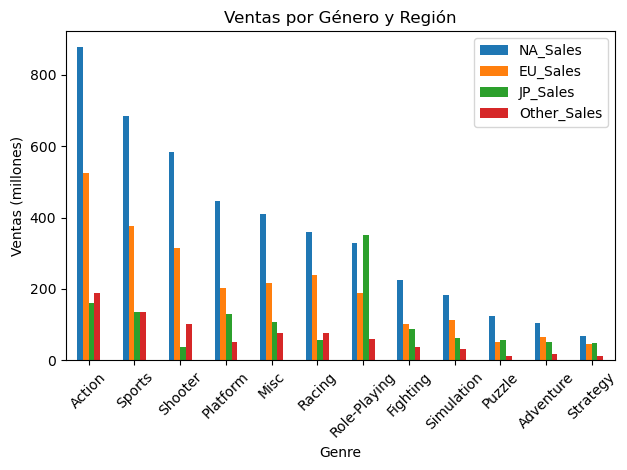

In [26]:
# Ventas totales por género y región
genre_region = (
    df
    .groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
    .sum()
    .sort_values(by='NA_Sales', ascending=False)
)

# Gráfico
plt.figure(figsize=(12,6))
genre_region.plot(kind='bar')
plt.title("Ventas por Género y Región")
plt.ylabel("Ventas (millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
#2-Ventas
#2.2-Top de ventas
top_games_year = df.loc[df.groupby('Year')['Global_Sales'].idxmax()]

top_games_year[['Year','Name','Global_Sales']]

,Year,Name,Global_Sales
258,1980,Asteroids,4.31
239,1981,Pitfall!,4.50
89,1982,Pac-Man,7.81
421,1983,Baseball,3.20
9,1984,Duck Hunt,28.31
1,1985,Super Mario Bros.,40.24
127,1986,The Legend of Zelda,6.51
251,1987,Zelda II: The Adventure of Link,4.38
22,1988,Super Mario Bros. 3,17.28
5,1989,Tetris,30.26


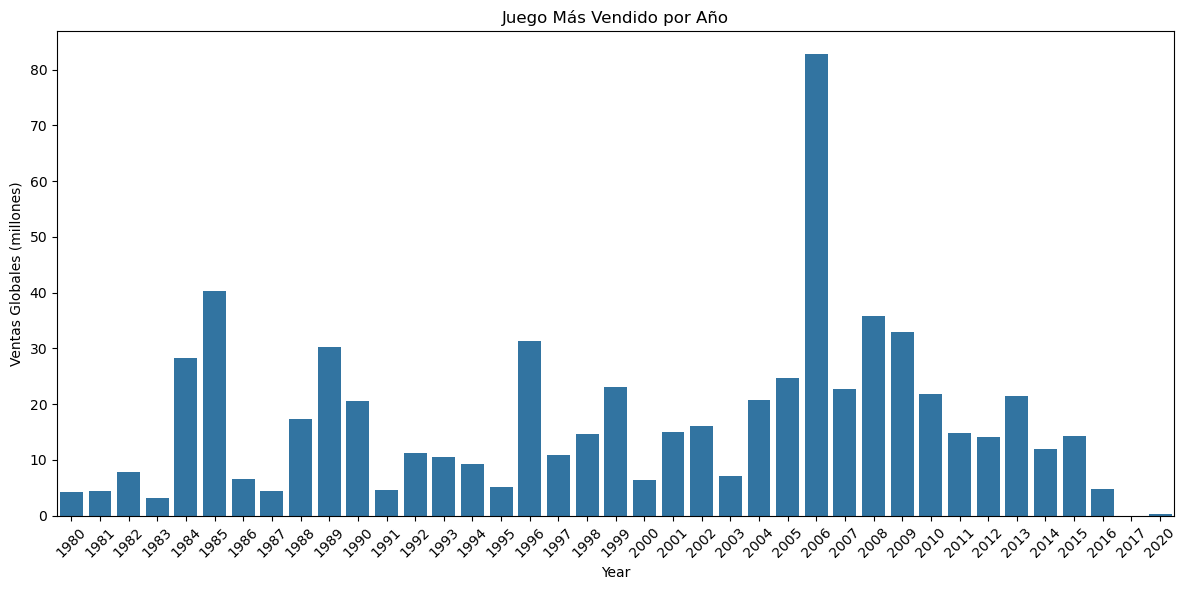

In [32]:
#Juegos más vendidos por año
top_games_year = df.loc[df.groupby('Year')['Global_Sales'].idxmax()]

plt.figure(figsize=(12,6))
sns.barplot(data=top_games_year, x='Year', y='Global_Sales')
plt.title("Juego Más Vendido por Año")
plt.ylabel("Ventas Globales (millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
#2-Ventas
#2.3-Plataformas con más ingresos por año
top_platforms_year = df.groupby(['Year','Platform'])['Global_Sales'].sum().reset_index()

top_platforms_year = top_platforms_year.loc[
    top_platforms_year.groupby('Year')['Global_Sales'].idxmax()
]

top_platforms_year

,Year,Platform,Global_Sales
0,1980,2600,11.38
1,1981,2600,35.77
2,1982,2600,28.86
4,1983,NES,10.96
6,1984,NES,50.09
9,1985,NES,53.44
12,1986,NES,36.41
14,1987,NES,19.76
17,1988,NES,45.01
20,1989,GB,64.98


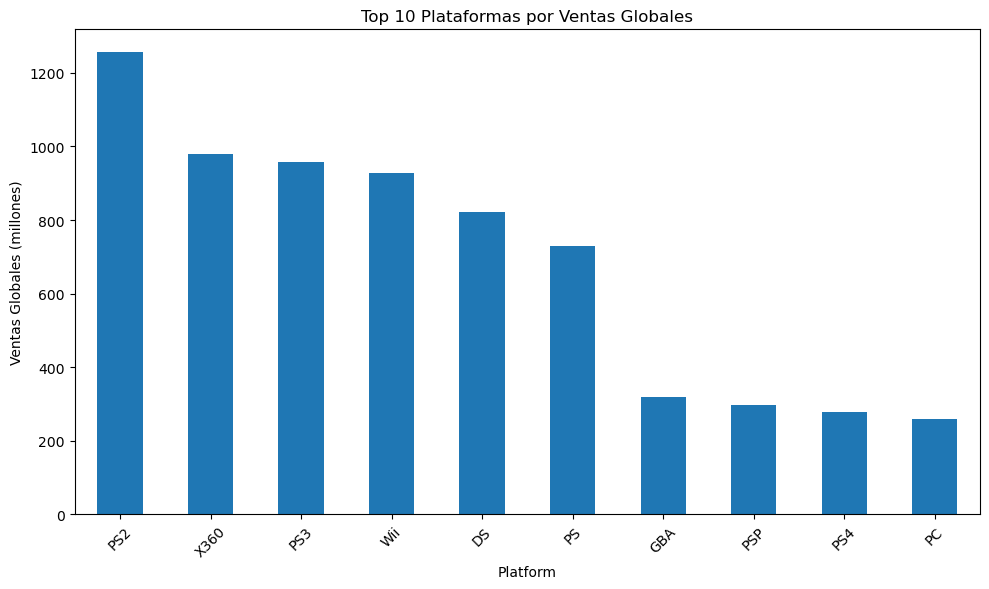

In [27]:
top_platforms = (
    df
    .groupby('Platform')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_platforms.plot(kind='bar')
plt.title("Top 10 Plataformas por Ventas Globales")
plt.ylabel("Ventas Globales (millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

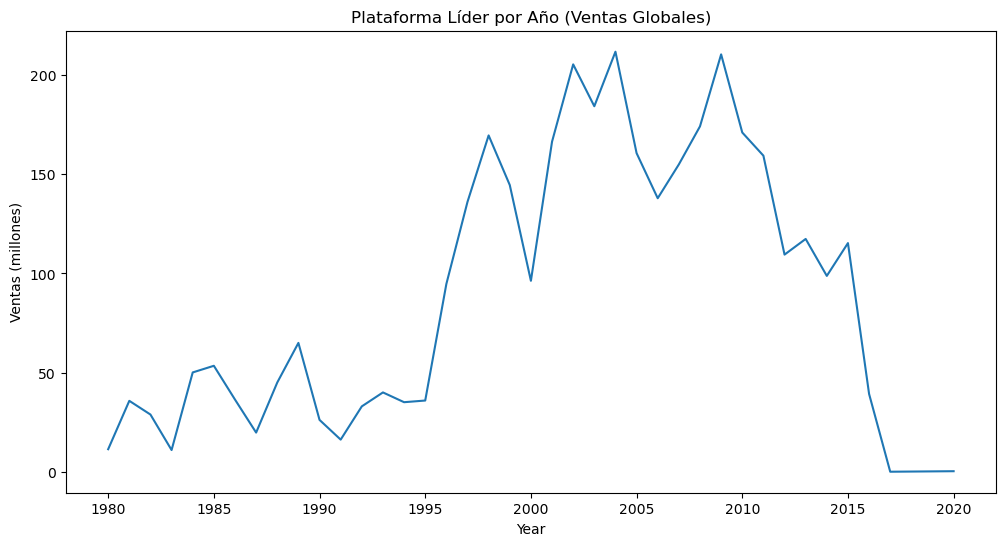

In [28]:
platform_year = (
    df
    .groupby(['Year','Platform'])['Global_Sales']
    .sum()
    .reset_index()
)

top_platform_year = platform_year.loc[
    platform_year.groupby('Year')['Global_Sales'].idxmax()
]

plt.figure(figsize=(12,6))
sns.lineplot(data=top_platform_year, x='Year', y='Global_Sales')
plt.title("Plataforma Líder por Año (Ventas Globales)")
plt.ylabel("Ventas (millones)")
plt.show()

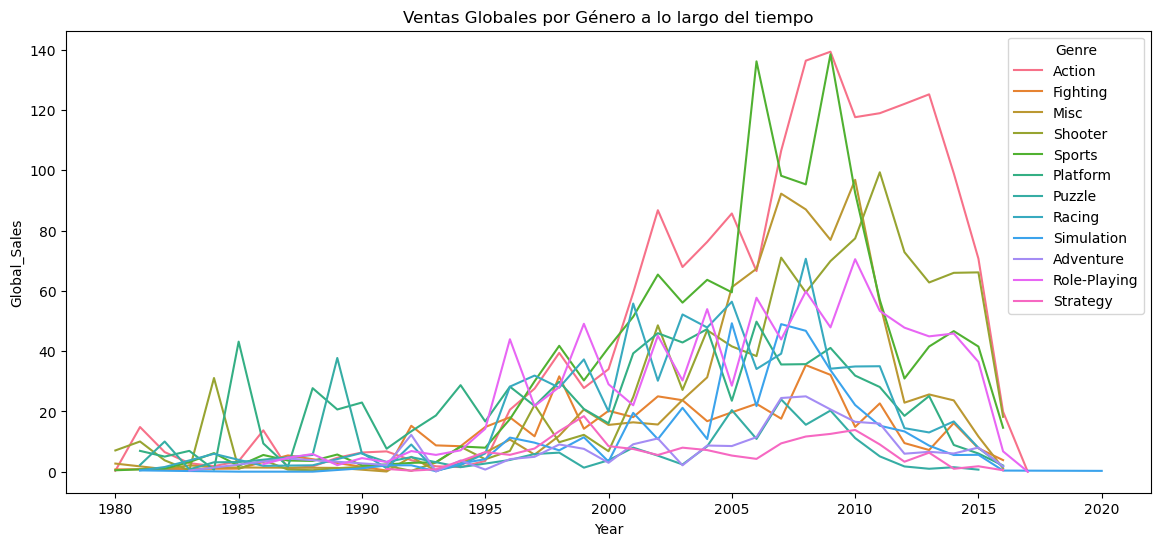

In [13]:
#2-Ventas
#2.4-Gráfico de comparación de ventas entre géneros por año
genre_year = df.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=genre_year, x='Year', y='Global_Sales', hue='Genre')
plt.title("Ventas Globales por Género a lo largo del tiempo")
plt.show()

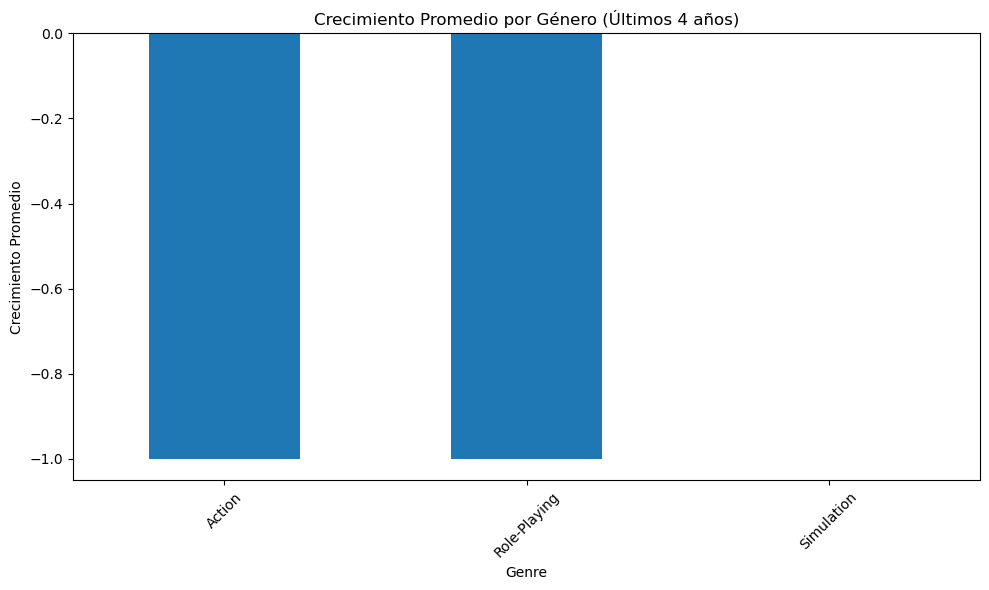

In [30]:
#Crecimiento por género (últimos 4 años)
last_year = df['Year'].max()
df_recent = df[df['Year'] >= last_year - 3]

genre_growth = (
    df_recent
    .groupby(['Year','Genre'])['Global_Sales']
    .sum()
    .unstack()
    .fillna(0)
)

genre_growth_pct = (
    genre_growth
    .pct_change()
    .mean()
    .sort_values()
)

plt.figure(figsize=(10,6))
genre_growth_pct.plot(kind='bar')
plt.title("Crecimiento Promedio por Género (Últimos 4 años)")
plt.ylabel("Crecimiento Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

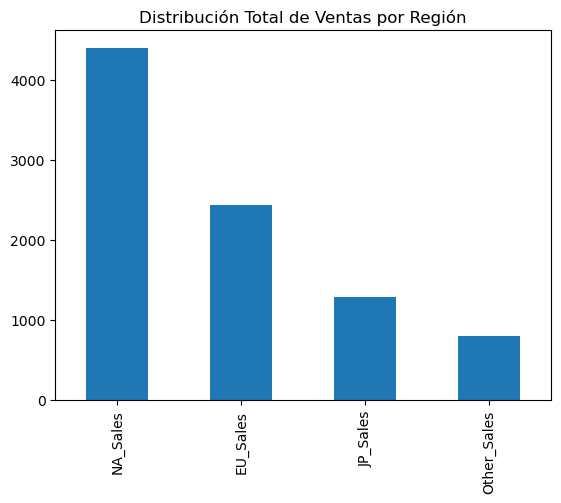

In [14]:
#Gráficos adicionales-Ventas por región
regional_totals = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

regional_totals.plot(kind='bar')
plt.title("Distribución Total de Ventas por Región")
plt.show()

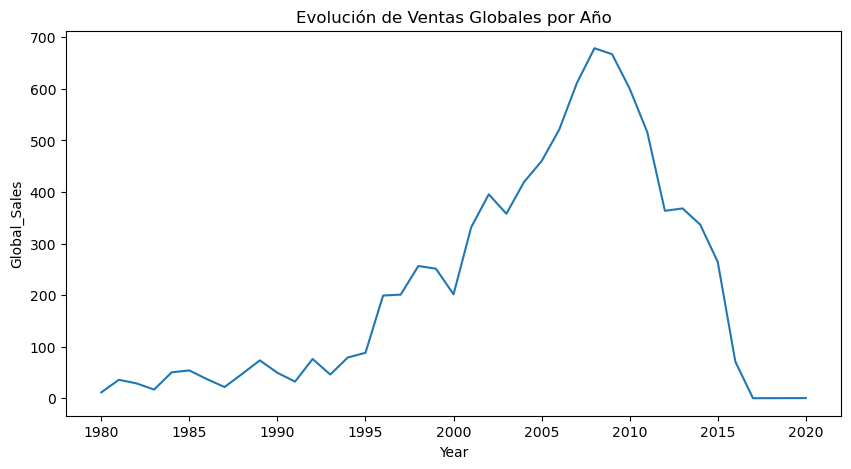

In [15]:
#Gráficos adicionales-Evolución del mercado
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_by_year, x=sales_by_year.index, y='Global_Sales')
plt.title("Evolución de Ventas Globales por Año")
plt.show()

In [16]:
#Para la siguiente parte se extraén los últimos 4 años
last_year = df['Year'].max()
df_recent = df[df['Year'] >= last_year - 3]

In [20]:
#3-Crecimiento
#3.1-Género con mayor y menor crecimiento
# Agrupar ventas por año y género
genre_growth = (
    df_recent
    .groupby(['Year','Genre'])['Global_Sales']
    .sum()
    .unstack()
    .fillna(0)
)

# Calcular crecimiento porcentual promedio
genre_growth_pct = (
    genre_growth
    .pct_change()
    .mean()
    .sort_values()
)

print("Género con MAYOR crecimiento:", genre_growth_pct.idxmax())
print("Género con MENOR crecimiento:", genre_growth_pct.idxmin())

print("\nCrecimiento promedio por género:")
print(genre_growth_pct)

Género con MAYOR crecimiento: Simulation
Género con MENOR crecimiento: Action

Crecimiento promedio por género:
Genre
Action         -1.0
Role-Playing   -1.0
Simulation      inf
dtype: float64


In [22]:
#3-Crecimiento
#3.2-Plataforma con mayor y menor crecimiento
# Agrupar ventas por año y plataforma
platform_growth = (
    df_recent
    .groupby(['Year','Platform'])['Global_Sales']
    .sum()
    .unstack()
    .fillna(0)
)
# Calcular crecimiento porcentual promedio
platform_growth_pct = (
    platform_growth
    .pct_change()
    .mean()
    .sort_values()
)

print("Plataforma con MAYOR crecimiento:", platform_growth_pct.idxmax())
print("Plataforma con MENOR crecimiento:", platform_growth_pct.idxmin())

print("\nCrecimiento promedio por plataforma:")
print(platform_growth_pct)

Plataforma con MAYOR crecimiento: DS
Plataforma con MENOR crecimiento: PS4

Crecimiento promedio por plataforma:
Platform
PS4   -1.0
PSV   -1.0
DS     inf
dtype: float64


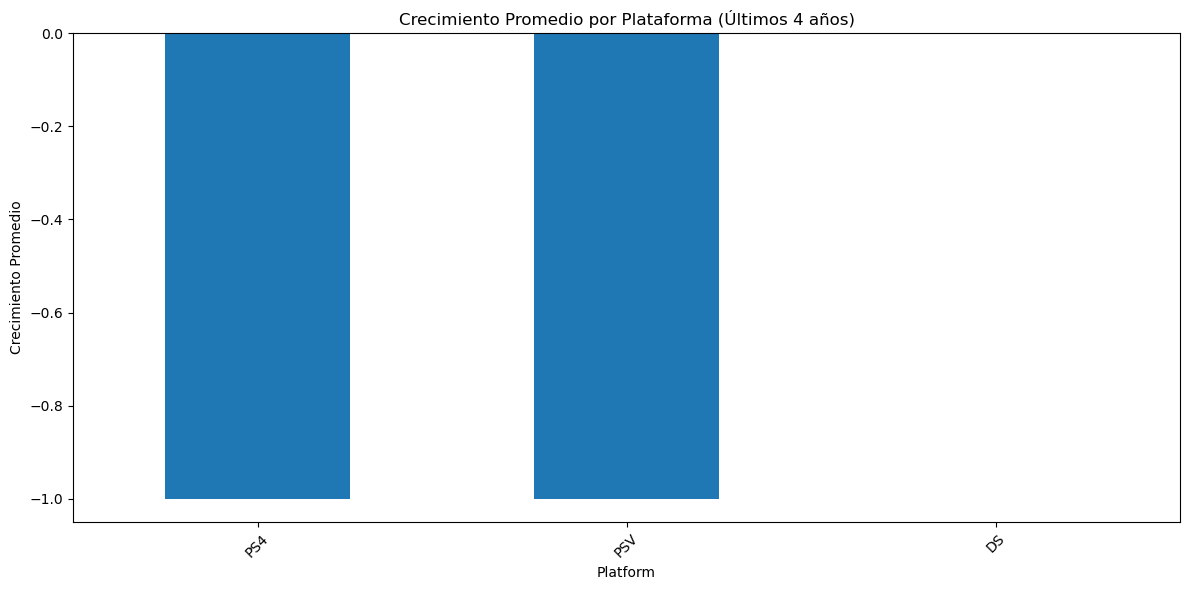

In [31]:
plt.figure(figsize=(12,6))
platform_growth_pct.plot(kind='bar')
plt.title("Crecimiento Promedio por Plataforma (Últimos 4 años)")
plt.ylabel("Crecimiento Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
#3-Crecimiento
#3.2-Plataforma con mayor y menor crecimiento
# Agrupar ventas por año y plataforma
game_growth = (
    df_recent
    .groupby(['Year','Name'])['Global_Sales']
    .sum()
    .unstack()
    .fillna(0)
)
# Calcular crecimiento porcentual promedio
game_growth_pct = (
    game_growth
    .pct_change()
    .mean()
    .sort_values()
)

print("Videojuego con MAYOR crecimiento:", game_growth_pct.idxmax())
print("Videojuego con MENOR crecimiento:", game_growth_pct.idxmin())

print("\nCrecimiento promedio por videojuego:")
print(game_growth_pct)

Videojuego con MAYOR crecimiento: Imagine: Makeup Artist
Videojuego con MENOR crecimiento: Brothers Conflict: Precious Baby

Crecimiento promedio por videojuego:
Name
Brothers Conflict: Precious Baby                   -1.0
Phantasy Star Online 2 Episode 4: Deluxe Package   -1.0
Imagine: Makeup Artist                              inf
dtype: float64


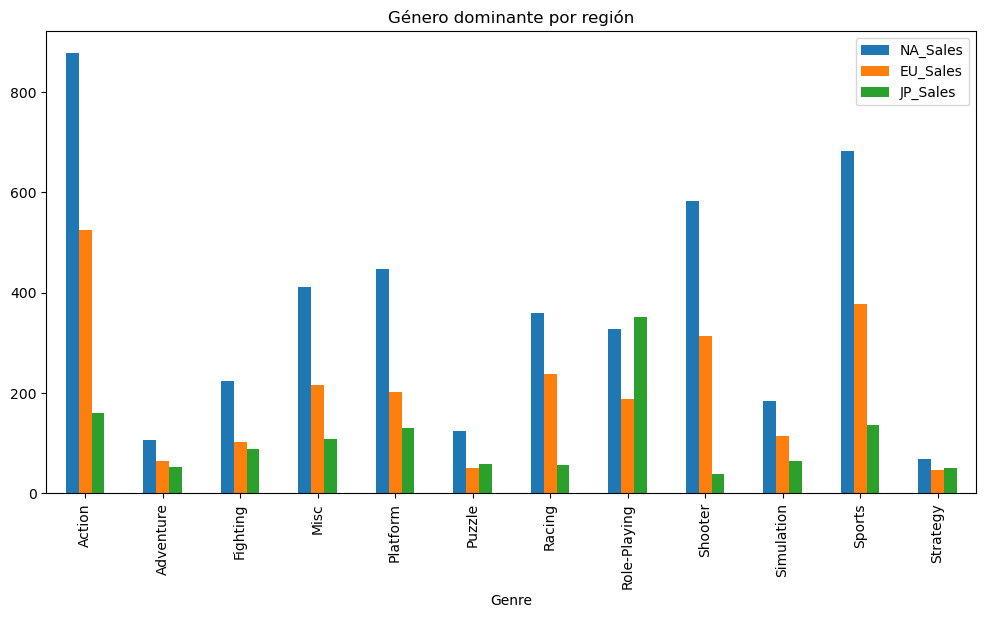

In [24]:
#Oportunidades de mercado 1-Géneros fuertes en regiones específicas
region_genre = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum()

region_genre.plot(kind='bar', figsize=(12,6))
plt.title("Género dominante por región")
plt.show()

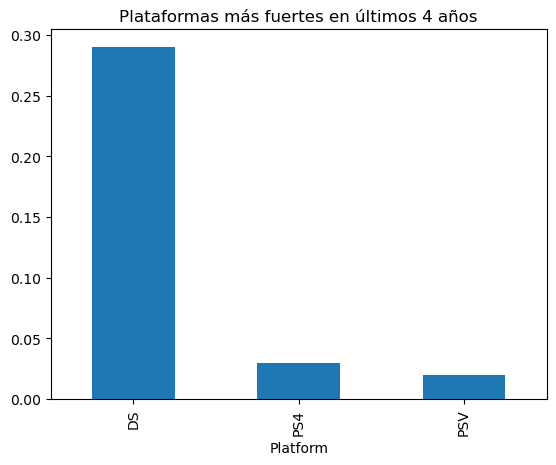

In [25]:
#Oportunidades de mercado 2-Plataformas emergentes recientes
recent_platform = df_recent.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

recent_platform.plot(kind='bar')
plt.title("Plataformas más fuertes en últimos 4 años")
plt.show()